In [36]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats


In [37]:
## Output File (CSV)
data_file_day = "archive/day.csv"
data_file_hour="archive/hour.csv"
#Creating DataFrame
Bike_Share_Day=pd.read_csv(data_file_day)
Bike_Share_Hour=pd.read_csv(data_file_hour)
#print(Bike_Share_Day.head())
print(Bike_Share_Hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# Time of day vs Bike Rentals

In [38]:
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).count()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bikes Count':Bike_Hour_Count})
Bike_Hour_Count_df.head()

,Bikes Count
hr,
0,726
1,724
2,715
3,697
4,697


# Weather patterns vs Bike Rentals

# Seasons vs Bike Rentals

# Weekday versus Weekend versus Holidays Bike Rentals

In [59]:

# Clean up the df to only have types of days and counts
Bike_Share_Day_Drop = Bike_Share_Day[['weekday', 'workingday', 'holiday', 'cnt']]
Bike_Share_Day_Drop['cnt'].sum()
# Number of rentals over the workingdays

# Identifying the day types (could alternatively use groupby method)
WorkingDay_Bike_Share = Bike_Share_Day_Drop.loc[Bike_Share_Day_Drop['workingday'] == 1]
Weekends_Bike_Share = Bike_Share_Day_Drop.loc[(Bike_Share_Day_Drop['weekday'] == 0) | (Bike_Share_Day_Drop['weekday'] == 6)]
Holiday_Bike_Share = Bike_Share_Day_Drop.loc[Bike_Share_Day_Drop['holiday'] == 1]

# Summing number of rentals per day type
WorkingDay_Counts = WorkingDay_Bike_Share['cnt'].sum()
WeekendsDay_Counts = Weekends_Bike_Share['cnt'].sum()
HolidayDays_Counts = Holiday_Bike_Share['cnt'].sum()

# printing results to see what we're working with
print(f'Working Days Count: {WorkingDay_Counts}, Weekend Days Count: {WeekendsDay_Counts} and Holidays Count: {HolidayDays_Counts}')

# Verifying counts for sanity check
totalbike_counts = Bike_Share_Day_Drop['cnt'].sum()
totalbike_counts_2 = WorkingDay_Counts + WeekendsDay_Counts + HolidayDays_Counts
print(f' OG Counts {totalbike_counts}, OG verification {totalbike_counts_2}')

# getting average counts per diem
Number_of_WorkingDays = WorkingDay_Bike_Share['cnt'].count()
WorkingDay_Counts_perdiem = WorkingDay_Counts/Number_of_WorkingDays

Number_of_Weekend_Days = Weekends_Bike_Share['cnt'].count()
WeekendDay_Counts_perdiem = WeekendsDay_Counts/Number_of_Weekend_Days

Number_of_Holidays = Holiday_Bike_Share['cnt'].count()
HoliDay_Counts_perdiem = HolidayDays_Counts/Number_of_Holidays

# printing numbers to see what we're working with
print(f' Workingdays {Number_of_WorkingDays}, Weekends {Number_of_Weekend_Days}, Holidays {Number_of_Holidays}')
print(f' Total Days {Number_of_WorkingDays + Number_of_Weekend_Days + Number_of_Holidays}')
print(f" Working Days Average Ride Count: {WorkingDay_Counts_perdiem}, Weekend Days Average Ride Count: {WeekendDay_Counts_perdiem}, Holidays Average Ride Count: {HoliDay_Counts_perdiem}")

Working Days Count: 2292410, Weekend Days Count: 921834 and Holidays Count: 78435
 OG Counts 3292679, OG verification 3292679
 Workingdays 500, Weekends 210, Holidays 21
 Total Days 731
 Working Days Average Ride Count: 4584.82, Weekend Days Average Ride Count: 4389.685714285714, Holidays Average Ride Count: 3735.0


<BarContainer object of 3 artists>

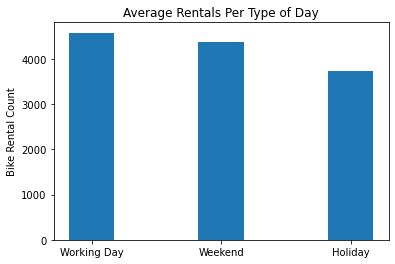

In [61]:
# creating the bar chart to visualize the data
x = np.arange(len(height))
height = [WorkingDay_Counts_perdiem, WeekendDay_Counts_perdiem, HoliDay_Counts_perdiem]
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["Working Day", "Weekend", "Holiday"])
plt.title("Average Rentals Per Type of Day")
plt.ylabel('Bike Rental Count')
plt.bar(x, height, width=0.35, bottom=None, align='center', data=None)



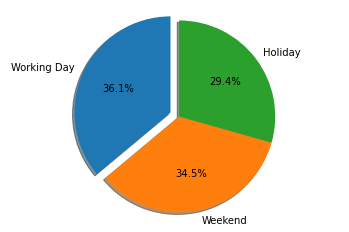

In [67]:
labels = 'Working Day', 'Weekend', 'Holiday'
sizes = [WorkingDay_Counts_perdiem, WeekendDay_Counts_perdiem, HoliDay_Counts_perdiem]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [65]:
# Performing ANOVA test on the number of rentals for each type of day.
group1 = WorkingDay_Bike_Share['cnt']
group2 = Weekends_Bike_Share['cnt']
group3 = Holiday_Bike_Share['cnt']
stats.f_oneway(group1, group2, group3)


F_onewayResult(statistic=2.465184866770529, pvalue=0.08570238266758495)